# Rocky Wu - jywu3

Code Source that I looked at and learned from: [link](https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek07%2Fprep_notebook_week07_part1.ipynb)

As usual, import the packages we want

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import bqplot
import matplotlib.colors as mpl_colors

Set the seed for the down sampling to make sure we could reproduce the results

In [2]:
np.random.seed(2022)

### Explore the dataset:

The name of the dataset: Yellow Taxi trip data 2021-01 in NYC

We can obtain the dataset at the TLC official site. https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

The link towards the dataset:
https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv

Preferably, download the dataset first as the dataset is fairly large, 126MB. 

No identification of the license, so I am assuming we can play around with it. I do find an user guide of the dataset, but not much was mentioned on what we can do with the data. Link to the user guide: https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

The dictionary of the dataset:https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf



#### Columns explained:
VendorID - A code indicating the TPEP provider that provided the record. [1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.]

tpep_pickup_datetime - The date and time when the meter was engaged.

tpep_dropoff_datetime - The date and time when the meter was disengaged.

Passenger_count - The number of passengers in the vehicle. This is a driver-entered value.

Trip_distance - The elapsed trip distance in miles reported by the taximeter.

PULocationID - TLC Taxi Zone in which the taximeter was engaged

DOLocationID - TLC Taxi Zone in which the taximeter was disengaged

RateCodeID - The final rate code in effect at the end of the trip.
[1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride]

Store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
[Y= store and forward trip, N= not a store and forward trip]

Payment_type - A numeric code signifying how the passenger paid for the trip.
[1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip]

Fare_amount - The time-and-distance fare calculated by the meter.

Extra - Miscellaneous extras and surcharges. Currently, this only includes the \\$0.50 and \\$1 rush hour and overnight charges.

MTA_tax - \\$0.50 MTA tax that is automatically triggered based on the metered rate in use.

Improvement_surcharge - \\$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.

Tolls_amount - Total amount of all tolls paid in trip.

Total_amount - The total amount charged to passengers. Does not include cash tips.

In [3]:
# Original import using the link
# data = pd.read_csv("https://s3.amazonaws.com/
# nyc-tlc/trip+data/yellow_tripdata_2021-01.csv")
# This directory is based on the directory on my hard drive
# and the file structure on GitHub
data = pd.read_csv("../data/yellow_tripdata_2021-01.csv", 
                   low_memory=False)

There was a warning indicating the dtype conflicts in some of the columns in the dataset. Will deal with the warning in the later stage. Escaping the warning now by setting low_memory = False

Take a look of the dataset

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


In total 1369765 rows inside the dataset, indeed a large one.

In [5]:
dataLength = len(data)
dataLength

1369765

How many columns:

In [6]:
len(data.columns)

18

Take a look on the columns

In [7]:
for c in data.columns:
    print(c)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge


We will first downsample the dataset, else my computer could not handle the dataset. I am taking the number of samples to be 0.1% of the original dataset else my computer would crash. Feel free to adjust the sample to see different results. 

In [8]:
np.random.seed(0)
nsamples = len(data) // 1000
downSampleMask = np.random.choice(range(len(data)-1), 
                                  nsamples, replace=False)
downSampleMask, len(downSampleMask)

(array([1215088,  612594,  259095, ..., 1329213, 1198929, 1159706]), 1369)

In [9]:
data = data.loc[downSampleMask]
len(data)

1369

In [10]:
dataLength = len(data)
dataLength

1369

In [11]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.50,2.50,0.5,0.00,0.0,0.3,8.80,2.5
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.50,0.00,0.5,1.96,0.0,0.3,11.76,2.5
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.50,0.00,0.5,1.76,0.0,0.3,10.56,2.5
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.00,1.00,0.5,2.00,0.0,0.3,19.30,2.5
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.50,0.00,0.5,0.00,0.0,0.3,7.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317468,NaN,2021-01-19 15:06:00,2021-01-19 16:09:00,NaN,12.36,NaN,NaN,170,72,NaN,35.65,2.75,0.5,0.00,0.0,0.3,39.20,0.0
1173660,1.0,2021-01-29 12:38:05,2021-01-29 12:57:56,8.0,2.10,1.0,N,163,48,1.0,13.00,2.50,0.5,0.00,0.0,0.3,16.30,2.5
1329213,NaN,2021-01-23 12:17:00,2021-01-23 13:24:00,NaN,20.39,NaN,NaN,188,191,NaN,53.75,2.75,0.5,0.00,0.0,0.3,57.30,0.0
1198929,2.0,2021-01-29 19:07:52,2021-01-29 19:14:58,1.0,1.14,1.0,N,239,151,1.0,7.00,1.00,0.5,1.00,0.0,0.3,12.30,2.5


After downsampling the dataset, we can use the pd.isnull to determine if there were nan values inside the columns

Print out the if nan values exists in the column

In [12]:
for c in data.columns:
    if pd.isnull(data[c].unique()).any():
        print(c)
    # print(c, pd.isnull(data[c].unique()).any())

VendorID
passenger_count
RatecodeID
store_and_fwd_flag
payment_type


From the output above, we now know that there were some nan values in VendorID, passenger_count, RatecodeID, payment_type. I decide to drop all the nan values in the dataset so that we would not be impacted by the nan values when calculating numeric values. The procedure will be in the following part

### Explore the values inside each column

The below prints out if there were any nan values inside each column, before printing out the nan values, we would need to convert some columns' datatype

In [13]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

From the above, we can tell that the two datetime columns and the flag column need some cleaning. We would convert the object in datetime columns into datetime objects and the flag should be converted to string/text data type. 

The two datetime columns first:

In [14]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [15]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [16]:
data['tpep_pickup_datetime'].head(), data['tpep_dropoff_datetime'].head()

(1215088   2021-01-30 12:21:33
 612594    2021-01-16 12:23:31
 259095    2021-01-08 07:07:00
 1049052   2021-01-26 19:17:16
 220625    2021-01-07 10:13:49
 Name: tpep_pickup_datetime, dtype: datetime64[ns],
 1215088   2021-01-30 12:26:14
 612594    2021-01-16 12:29:11
 259095    2021-01-08 07:10:36
 1049052   2021-01-26 19:33:39
 220625    2021-01-07 10:16:42
 Name: tpep_dropoff_datetime, dtype: datetime64[ns])

Good, now we have changed the datatype of the dates into the correct type, lets see if there are any nan or strange entries in the column

In [17]:
pd.to_datetime(data['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 30), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 8), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 21),
       datetime.date(2021, 1, 18), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 17),
       datetime.date(2021, 1, 6), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 15),
       datetime.date(2021, 1, 24), datetime.date(2021, 1, 25),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 1),
       datetime.date(2021, 1, 31), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 27),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 19)], dtype=object)

#### The part below will be very important to execute if the downsampled dataset was adjusted to a larger sample, as there are some data that went out of range of the month. But for the sample at now, the following part would not adjust the dataset. 

Notice that we have three errorous data in the dataset, some indicated 2008/12/31, some indicated 2020/12/31 and the rest indicating 2009/12/31. We should remove these entries.

In [18]:
data[(data['tpep_pickup_datetime'] <= "2020-12-31 23:59:59") 
     | (data['tpep_pickup_datetime'] > "2021-01-31 23:59:59")]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


In [19]:
dropIndex = list(data[(data['tpep_pickup_datetime'] <= "2020-12-31 23:59:59") | (data['tpep_pickup_datetime'] > "2021-01-31 23:59:59")].index)

In [20]:
dropIndex

[]

In [21]:
data.drop([i for i in dropIndex], inplace=True)

In [22]:
pd.to_datetime(data['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 30), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 8), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 21),
       datetime.date(2021, 1, 18), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 17),
       datetime.date(2021, 1, 6), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 15),
       datetime.date(2021, 1, 24), datetime.date(2021, 1, 25),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 1),
       datetime.date(2021, 1, 31), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 27),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 19)], dtype=object)

Good, the errorous data were all dropped. Check if the length of the dataset is correct

In [23]:
dataLength - len(data) == len(dropIndex)

True

Great, now we can create a pickup_date that converts the pickup_datetime column into date column

In [24]:
# Take a look at the count of each date in the data
data.groupby(pd.to_datetime(data['tpep_pickup_datetime']).dt.date).size()

tpep_pickup_datetime
2021-01-01    26
2021-01-02    29
2021-01-03    28
2021-01-04    44
2021-01-05    45
2021-01-06    47
2021-01-07    44
2021-01-08    71
2021-01-09    42
2021-01-10    34
2021-01-11    46
2021-01-12    65
2021-01-13    44
2021-01-14    42
2021-01-15    63
2021-01-16    36
2021-01-17    37
2021-01-18    35
2021-01-19    55
2021-01-20    42
2021-01-21    59
2021-01-22    53
2021-01-23    47
2021-01-24    27
2021-01-25    53
2021-01-26    42
2021-01-27    39
2021-01-28    54
2021-01-29    57
2021-01-30    30
2021-01-31    33
dtype: int64

In [25]:
data['pickup_date'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.date
data['pickup_date'] = pd.to_datetime(data['pickup_date'])
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5,2021-01-30
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,2021-01-16
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5,2021-01-08
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5,2021-01-26
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5,2021-01-07


Check if we accidentally create some errorous data

In [26]:
data['pickup_date'].unique()

array(['2021-01-30T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-29T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-24T00:00:00.000000000', '2021-01-25T00:00:00.000000000',
       '2021-01-23T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-31T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-27

In [27]:
# Create a grouped date variable for later use
grouped_date = data['pickup_date'].unique()

Now the flag one is bit complicated, we would have to deal with nan values...

Actually, we would not need to convert the flag columns, as we still can filter out the results using string. But we would still need to cope with the nan values in this column.

In [28]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype(str)

In [29]:
data[data['store_and_fwd_flag'] == 'N'].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5,2021-01-30
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,2021-01-16
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5,2021-01-08
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5,2021-01-26
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5,2021-01-07


Now we would look at the numeric columns that we are interested in

Take a look at the total amount column

In [30]:
data['total_amount'].shape, data['total_amount'].sum()

((1369,), 23771.09)

Lets check the values inside total amount

In [31]:
data['total_amount'].min(), data['total_amount'].max()

(-59.8, 133.17)

OK, Now we have negative values in total amount, we would need to remove these data values

In [32]:
data[(data['total_amount'] <= 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
791170,2.0,2021-01-20 19:56:42,2021-01-20 19:56:49,1.0,0.01,1.0,N,236,236,3.0,-2.50,-0.5,-0.5,0.0,0.0,-0.3,-6.30,-2.5,2021-01-20
1240300,2.0,2021-01-30 22:23:51,2021-01-30 22:28:31,1.0,0.87,1.0,N,164,48,3.0,-5.50,-0.5,-0.5,0.0,0.0,-0.3,-9.30,-2.5,2021-01-30
954475,2.0,2021-01-24 16:36:04,2021-01-24 16:36:10,1.0,0.00,5.0,N,193,193,4.0,-0.05,0.0,0.0,0.0,0.0,-0.3,-0.35,0.0,2021-01-24
675200,2.0,2021-01-18 10:46:18,2021-01-18 10:48:23,1.0,0.50,1.0,N,90,246,3.0,-3.50,0.0,-0.5,0.0,0.0,-0.3,-6.80,-2.5,2021-01-18
1154872,2.0,2021-01-29 02:00:19,2021-01-29 02:19:35,1.0,8.64,1.0,N,147,220,2.0,-27.00,-0.5,-0.5,0.0,0.0,-0.3,-28.30,0.0,2021-01-29
519324,2.0,2021-01-14 11:35:19,2021-01-14 12:02:14,1.0,4.32,1.0,N,75,48,2.0,-20.00,0.0,-0.5,0.0,0.0,-0.3,-23.30,-2.5,2021-01-14
1000999,2.0,2021-01-25 18:08:59,2021-01-25 18:09:17,1.0,0.00,1.0,N,244,244,2.0,-2.50,-1.0,-0.5,0.0,0.0,-0.3,-4.30,0.0,2021-01-25
1004798,2.0,2021-01-25 18:43:57,2021-01-25 18:44:10,4.0,0.09,2.0,N,239,239,3.0,-52.00,-4.5,-0.5,0.0,0.0,-0.3,-59.80,-2.5,2021-01-25
938064,2.0,2021-01-24 06:29:33,2021-01-24 06:34:22,1.0,0.80,1.0,N,48,170,3.0,-5.50,0.0,-0.5,0.0,0.0,-0.3,-8.80,-2.5,2021-01-24
965753,2.0,2021-01-25 01:43:29,2021-01-25 01:51:57,1.0,2.17,1.0,N,129,146,4.0,-9.00,-0.5,-0.5,0.0,0.0,-0.3,-10.30,0.0,2021-01-25


In [33]:
dropIndex = list(data[(data['total_amount'] <= 0)].index)
dropIndex[:5], len(dropIndex)

([791170, 1240300, 954475, 675200, 1154872], 11)

In [34]:
data.drop([i for i in dropIndex], inplace=True)

In [35]:
data['total_amount'].min(), data['total_amount'].max()

(3.3, 133.17)

Still, there is a huge gap. Lets take a look if this 715.3 is an outlier

In [36]:
sorted(list(data['total_amount']))[-5:]

[73.7, 77.84, 88.55, 98.92, 133.17]

Seems like this 715.3 is an outlier. I decide to remove the outlier to make sure our dataset clean

In [37]:
dropIndex = list(data[data['total_amount'] == 715.3].index)
dropIndex

[]

In [38]:
data.drop([i for i in dropIndex], inplace=True)

In [39]:
data['total_amount'].min(), data['total_amount'].max()

(3.3, 133.17)

Good, all the negative total amounts are dropped.

So, the shape of the total amount column is a 1 dimensional array, we need to group the total amounts into accumulation of each date. Try to create the grouped total amount.

In [40]:
grouped_total_amount = data['total_amount'].groupby(data['pickup_date']).sum()
grouped_total_amount

pickup_date
2021-01-01     487.80
2021-01-02     558.69
2021-01-03     450.31
2021-01-04     826.71
2021-01-05     893.61
2021-01-06     938.84
2021-01-07     683.03
2021-01-08    1125.15
2021-01-09     703.65
2021-01-10     591.28
2021-01-11     785.71
2021-01-12    1115.19
2021-01-13     857.56
2021-01-14     744.58
2021-01-15    1101.23
2021-01-16     664.46
2021-01-17     512.99
2021-01-18     514.06
2021-01-19    1113.85
2021-01-20     600.35
2021-01-21    1089.24
2021-01-22     967.33
2021-01-23     998.67
2021-01-24     471.99
2021-01-25     856.31
2021-01-26     713.68
2021-01-27     659.88
2021-01-28     895.88
2021-01-29     964.64
2021-01-30     447.15
2021-01-31     603.12
Name: total_amount, dtype: float64

Check if we accidentally excluded some data

In [41]:
data['total_amount'].sum(), grouped_total_amount.sum()

(23936.940000000002, 23936.940000000002)

In [42]:
grouped_total_amount.sum() == round(data['total_amount'].sum(), 2)

False

Great, now we have the total amount sums grouped by date, now on the distance

Check if we have errorous data in trip distance

In [43]:
pd.isnull(data['trip_distance'].unique()).any()

False

In [44]:
data['trip_distance'].min(), data['trip_distance'].max()

(0.0, 36.75)

In the dataset, we have some 0 values. We will need to remove them

In [45]:
data[data['trip_distance'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
303465,2.0,2021-01-09 04:08:00,2021-01-09 04:08:07,1.0,0.0,5.0,N,48,264,1.0,8.00,0.0,0.5,0.00,0.00,0.3,11.30,2.5,2021-01-09
852827,1.0,2021-01-22 09:12:13,2021-01-22 09:38:42,1.0,0.0,1.0,N,159,161,1.0,22.20,0.0,0.5,0.00,0.00,0.3,23.00,0.0,2021-01-22
563444,1.0,2021-01-15 10:00:25,2021-01-15 10:21:55,1.0,0.0,1.0,N,177,80,1.0,17.20,0.0,0.5,0.00,0.00,0.3,18.00,0.0,2021-01-15
244193,1.0,2021-01-07 17:32:32,2021-01-07 18:00:51,1.0,0.0,1.0,N,232,42,1.0,28.20,0.0,0.5,0.00,0.00,0.3,29.00,0.0,2021-01-07
1169592,1.0,2021-01-29 11:27:21,2021-01-29 11:51:47,1.0,0.0,1.0,N,261,217,1.0,20.20,0.0,0.5,0.00,0.00,0.3,21.00,0.0,2021-01-29
394825,2.0,2021-01-11 15:05:56,2021-01-11 15:06:06,1.0,0.0,5.0,N,237,237,1.0,13.00,0.0,0.0,0.00,0.00,0.3,15.80,2.5,2021-01-11
428884,1.0,2021-01-12 12:13:38,2021-01-12 12:46:21,1.0,0.0,1.0,N,260,216,1.0,37.20,0.0,0.5,0.00,0.00,0.3,38.00,0.0,2021-01-12
141473,1.0,2021-01-05 14:28:43,2021-01-05 14:28:52,1.0,0.0,1.0,N,146,146,2.0,2.50,0.0,0.5,0.00,0.00,0.3,3.30,0.0,2021-01-05
15903,2.0,2021-01-01 16:58:50,2021-01-01 16:58:59,2.0,0.0,1.0,N,68,68,1.0,2.50,0.0,0.5,7.08,0.00,0.3,12.88,2.5,2021-01-01
43391,2.0,2021-01-02 17:35:05,2021-01-02 17:35:32,4.0,0.0,5.0,N,138,138,1.0,45.00,0.0,0.0,8.50,6.12,0.3,59.92,0.0,2021-01-02


In [46]:
dropIndex = list(data[data['trip_distance'] <= 0].index)
dropIndex[:5], len(dropIndex)

([303465, 852827, 563444, 244193, 1169592], 19)

In [47]:
data.drop([i for i in dropIndex], inplace=True)

In [48]:
data['trip_distance'].min(), data['trip_distance'].max()

(0.06, 36.75)

In [49]:
data['trip_distance'].shape, data['trip_distance'].sum()

((1339,), 3972.33)

So, the shape of the trip distance column is a 1 dimensional array, we need to group the trip distances into accumulation of each date

In [50]:
grouped_trip_distance = data['trip_distance'].groupby(data['pickup_date']).sum()
grouped_trip_distance

pickup_date
2021-01-01     96.91
2021-01-02     89.82
2021-01-03     74.39
2021-01-04    161.26
2021-01-05    151.29
2021-01-06    168.14
2021-01-07     91.44
2021-01-08    158.93
2021-01-09    125.58
2021-01-10    117.44
2021-01-11    129.67
2021-01-12    174.24
2021-01-13    149.15
2021-01-14    110.59
2021-01-15    188.06
2021-01-16    125.86
2021-01-17     77.19
2021-01-18     81.38
2021-01-19    200.25
2021-01-20     72.13
2021-01-21    163.93
2021-01-22    152.14
2021-01-23    192.71
2021-01-24     95.37
2021-01-25    143.14
2021-01-26    107.59
2021-01-27    108.28
2021-01-28    139.93
2021-01-29    144.11
2021-01-30     72.02
2021-01-31    109.39
Name: trip_distance, dtype: float64

The last data we need to clean for this viz will be the passenger count. I would like to add this as the color axis of our heat map

In [51]:
pd.isnull(data['passenger_count'].unique()).any()

True

In [52]:
data['passenger_count'], data['passenger_count'].unique()

(1215088    0.0
 612594     1.0
 259095     5.0
 1049052    3.0
 220625     1.0
           ... 
 1317468    NaN
 1173660    8.0
 1329213    NaN
 1198929    1.0
 1159706    1.0
 Name: passenger_count, Length: 1339, dtype: float64,
 array([ 0.,  1.,  5.,  3.,  6., nan,  2.,  4.,  8.]))

Now, we have empty nan values. For the purpose of this graph, I will convert the nan values to 0 values and remove all the 0 and nan values

In [53]:
data[data['passenger_count'] == 0].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.0,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5,2021-01-30
968776,1.0,2021-01-25 07:29:33,2021-01-25 07:38:59,0.0,2.7,1.0,N,140,170,1.0,10.5,2.5,0.5,4.10,0.0,0.3,17.90,2.5,2021-01-25
112943,1.0,2021-01-04 18:23:29,2021-01-04 18:29:17,0.0,0.9,1.0,N,140,263,1.0,6.0,3.5,0.5,2.05,0.0,0.3,12.35,2.5,2021-01-04
1065766,1.0,2021-01-27 11:05:16,2021-01-27 11:37:54,0.0,16.3,1.0,N,140,265,1.0,45.5,2.5,0.5,9.75,0.0,0.3,58.55,2.5,2021-01-27
922392,1.0,2021-01-23 16:44:54,2021-01-23 16:53:33,0.0,1.7,1.0,N,236,74,1.0,8.5,2.5,0.5,1.00,0.0,0.3,12.80,2.5,2021-01-23


In [54]:
dropIndex = list(data[data['passenger_count'] == 0].index)
dropIndex[:5], len(dropIndex)

([1215088, 968776, 112943, 1065766, 922392], 26)

In [55]:
data.drop([i for i in dropIndex], inplace=True)

In [56]:
data = data[~pd.isnull(data['passenger_count'])]

In [57]:
data['passenger_count'].unique()

array([1., 5., 3., 6., 2., 4., 8.])

Now, calculate the sum of the passenger count grouped by date

In [58]:
grouped_passenger_count = data['passenger_count'].groupby(data['pickup_date']).sum()
grouped_passenger_count

pickup_date
2021-01-01    37.0
2021-01-02    33.0
2021-01-03    37.0
2021-01-04    60.0
2021-01-05    65.0
2021-01-06    64.0
2021-01-07    57.0
2021-01-08    88.0
2021-01-09    62.0
2021-01-10    52.0
2021-01-11    61.0
2021-01-12    75.0
2021-01-13    54.0
2021-01-14    50.0
2021-01-15    83.0
2021-01-16    45.0
2021-01-17    50.0
2021-01-18    57.0
2021-01-19    62.0
2021-01-20    49.0
2021-01-21    74.0
2021-01-22    75.0
2021-01-23    56.0
2021-01-24    38.0
2021-01-25    61.0
2021-01-26    62.0
2021-01-27    44.0
2021-01-28    65.0
2021-01-29    82.0
2021-01-30    48.0
2021-01-31    36.0
Name: passenger_count, dtype: float64

### Summary of the dataset:

There were in total 18 columns in the dataset. The names were printed above alongside their datatypes. The dataset represents the total trips of yellow taxi at NYC during January, 2021. The dataset includes many fields such as DateTime for each trip, specified to pick up time and drop off time. The trip distance, the fares, the rates, and the payment types and passenger numbers for each entry. On the site, the raw data is collected within the partnership with the NYC DOITT, but I could not find the person who created these datasets. The credits are not given either on the website or in the dataset. This dataset is interesting as we can analyze the pay for each driver and the relationship of their pay with the pay standard we have in NYC. Also, we can tell from this dataset that we could use this dataset to find out the market of taxis in NYC. The further analysis that I described above would also be interesting to explore.

### Plot of interest:

Lets make a simple one, a frequency graph with the x axis as everyday in January, and the y-axis as the count of taxi drives each date. (For each date, we are only considering the pickup time, as we will have some trips that begins late in one day and arrived on the next day, so I would merge these trips into the date when they started the trip)

The data looks good, now we were ready to create some simple data visualization on this dataset

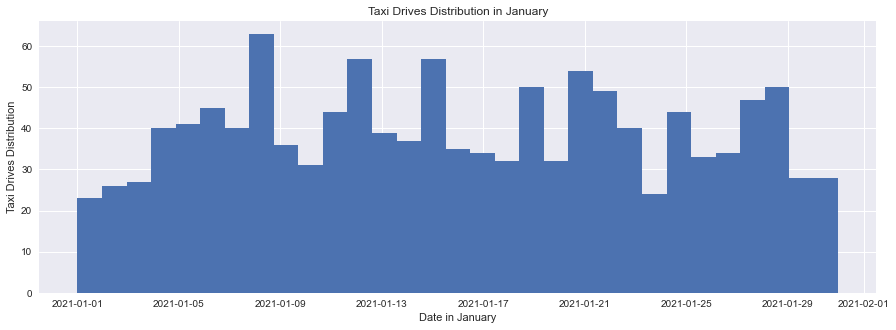

In [59]:
# Step 1 - hard code the stuff
style = 'seaborn'
graphBins = len(data['pickup_date'].unique())
with plt.style.context(style):
    fig, ax = plt.subplots(figsize=(15,5))
    plt.hist(x=data['pickup_date'], bins=graphBins)
    ax.set_xlabel('Date in January')
    ax.set_ylabel('Taxi Drives Distribution')
    ax.set_title('Taxi Drives Distribution in January')
    plt.show()

# Final Project Part 2 - Dashboard

We would continue on the previous frequency graph we made, and we would be producing more graphs as it goes. 

Lets check the data types again to make sure nothing is wrong

In [60]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date              datetime64[ns]
dtype: object

Good, seems nothing is wrong since the last part. Now lets try to shift the graph to bqplot

In [61]:
# try to shift to bqplot to produce the same graph

x_sch = bqplot.DateScale()
y_sch = bqplot.LinearScale()

# set p axis
x_axh = bqplot.Axis(scale = x_sch, label = 'Date in January')
# Adjusted the label offset so that the label would not collide
# with the data
y_axh = bqplot.Axis(scale = y_sch, 
                   orientation = 'vertical', 
                   label = 'Taxi Drives Distribution',
                   label_offset = "45px")

# (1) set up the marks
hist = bqplot.Hist(sample = data['pickup_date'],
                  normalized = False,
                  scales = {'sample':x_sch, 'count':y_sch},
                  bins=graphBins)

fig_hist = bqplot.Figure(marks=[hist], axes = [x_axh, y_axh])
# figh.layout.width = "800px"
fig_hist

Figure(axes=[Axis(label='Date in January', scale=DateScale()), Axis(label='Taxi Drives Distribution', label_of…

So we have successfully reproduced the graph using bqplot. Now it is time to include some interactions and dashboards.

### Scatter plot of total amount and trip distance with the color axis as passenger count for the graph

Now we have the all the data we need, we could create a scatter plot on this

In [62]:
data['total_amount'].max(), data['total_amount'].min()

(133.17, 4.8)

In [63]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

#(1) set up marks
scatters = bqplot.Scatter(x = data['trip_distance'],
                          y = data['total_amount'],
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

Take a look at the grouped values

In [64]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

#(1) set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

From the graph we can tell, our data is a bit of large so it the range is fairly big. And I haven't implement the color axis, which will be the passenger count of the dataset

Take a look at the individual values with color

In [65]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'Passenger Count', 
                       orientation = 'vertical', side = 'right')
                       # label_offset = "100px")

# set up marks
scatters = bqplot.Scatter(x = data['trip_distance'],
                          y = data['total_amount'],
                          color = data['passenger_count'],
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
# fig.layout.width = "600px"
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

Now the grouped values with color

In [66]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'Passenger Count', 
                       orientation = 'vertical', side = 'right')
                       # label_offset = "100px")

# set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          color = grouped_passenger_count,
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
# fig.layout.width = "600px"
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

After plotting the graph, not a bad color map, but I would still like to take the log for the passenger count, as it does have a huge range in sum

In [67]:
grouped_passenger_count.min(), grouped_passenger_count.max()

(33.0, 88.0)

Replot the graph with log10 computation on the passenger count

In [68]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'log(pass_c)', 
                       orientation = 'vertical', side = 'right')

# set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          color = np.log10(grouped_passenger_count),
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

Well... No clear difference indicated after taking the log of the passenger count... Will remove the log in later stage

Now we will try to create the heatmap by transforming the scatter plot we have into the heatmap

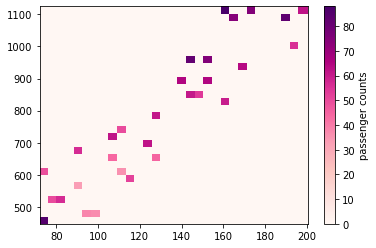

In [69]:
plt.hist2d(x=grouped_trip_distance, 
           y=grouped_total_amount, 
           weights=grouped_passenger_count, 
          bins = graphBins, 
          cmap = 'RdPu')
cb = plt.colorbar()
cb.set_label('passenger counts')

Now the individual data

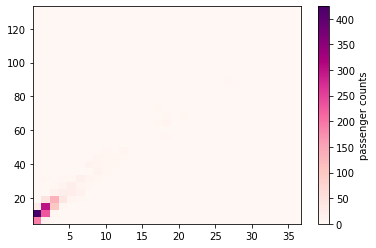

In [70]:
plt.hist2d(x=data['trip_distance'],
          y=data['total_amount'],
          weights=data['passenger_count'],
          bins=graphBins,
          cmap='RdPu')
cb = plt.colorbar()
cb.set_label('passenger counts')

Note that we did not get something good from both the graphs, as we have not rebin the graphs yet. The second graph is the reason why I choose to downsample the dataset. So that my computer would able to calculate the bins without pushing to its absolute limit. 

Take a look at the min and max of the binning

In [71]:
grouped_passenger_count.max(), grouped_passenger_count.min()

(88.0, 33.0)

In [72]:
data['passenger_count'].min(), data['passenger_count'].max()

(1.0, 8.0)

Clearly, for the grouped one, we would need to create a log scale for the passenger count, but for the individual ones, we could also try to do that as we are binning the data into 31 entries.

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


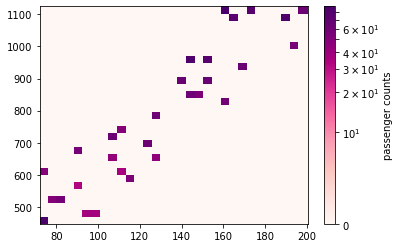

In [73]:
plt.hist2d(x=grouped_trip_distance, 
           y=grouped_total_amount, 
           weights=grouped_passenger_count, 
          bins = graphBins, 
          cmap = 'RdPu',
          norm = mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('passenger counts')

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


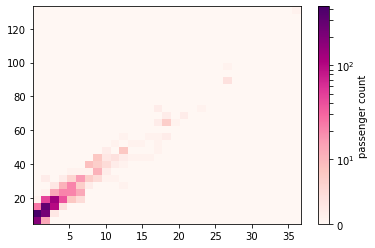

In [74]:
plt.hist2d(x=data['trip_distance'],
          y=data['total_amount'],
          weights=data['passenger_count'],
          bins = graphBins,
          cmap = 'RdPu',
          norm = mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('passenger count')

Great, this is much better for both the graph. We are now getting an mimic of our scatter plot on the heat map.

Now we would create the hist2d function to help us in the later stage

Grouped data:

In [75]:
ntrip_distance = 20
ntotal_payment = 20

hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                              grouped_total_amount,
                                              weights=grouped_passenger_count,
                                              bins = [ntrip_distance, ntotal_payment])

hist2d[:3]

array([[85., 50.,  0.,  0., 49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 57.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Individual data:

In [76]:
ntrip_distance = 20
ntotal_payment = 20

hist2dI, trip_edges, pay_edges = np.histogram2d(data['trip_distance'],
                                              data['total_amount'],
                                              weights=data['passenger_count'],
                                              bins = [ntrip_distance, ntotal_payment])

hist2dI[:3]

array([[532., 470.,   8.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  2., 316., 169.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   6.,  49.,  42.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

Take a look at the min and max for each hist2d array

In [77]:
hist2d.max(), hist2d.min(), hist2dI.max(), hist2dI.min()

(88.0, 0.0, 532.0, 0.0)

Take a quick look with imshow

Grouped data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


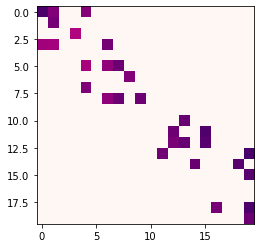

In [78]:
plt.imshow(hist2d, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Individual Data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


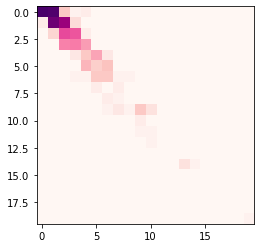

In [79]:
plt.imshow(hist2dI, cmap = 'RdPu', norm = mpl_colors.SymLogNorm(10))

So, from the graph above, we can tell that the orientation of the grouped and the individual graphs are a bit wrong. We would want them to rotate 180 degrees, which we could use the Transpose function.

Grouped Data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


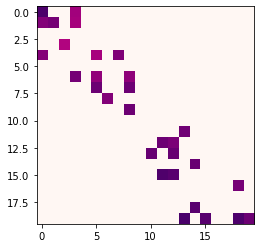

In [80]:
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

Individual Data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


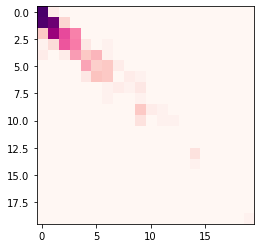

In [81]:
plt.imshow(hist2dI.T, cmap = 'RdPu', norm=mpl_colors.SymLogNorm(10))

Now we would incorporate the edges~

Grouped Data:

In [82]:
hist2d, trip_edges, pay_edges = np.histogram2d(x=grouped_trip_distance,
                                              y=grouped_total_amount,
                                              weights=grouped_passenger_count,
                                               density = True,
                                              bins = [ntrip_distance, ntotal_payment])

hist2d.max(), hist2d.min()

(0.00022720381932346705, 0.0)

In [83]:
hist2d.shape, trip_edges.shape, pay_edges.shape

((20, 20), (21,), (21,))

In [84]:
trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
trip_centers

array([ 75.22575,  81.63725,  88.04875,  94.46025, 100.87175, 107.28325,
       113.69475, 120.10625, 126.51775, 132.92925, 139.34075, 145.75225,
       152.16375, 158.57525, 164.98675, 171.39825, 177.80975, 184.22125,
       190.63275, 197.04425])

In [85]:
pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
pay_centers

array([ 464.1,  498. ,  531.9,  565.8,  599.7,  633.6,  667.5,  701.4,
        735.3,  769.2,  803.1,  837. ,  870.9,  904.8,  938.7,  972.6,
       1006.5, 1040.4, 1074.3, 1108.2])

In [86]:
trip_centers.min(), trip_centers.max(), pay_centers.min(), pay_centers.max()

(75.22575, 197.04425, 464.1, 1108.2)

In [87]:
trip_bins = np.linspace(trip_centers.min(), trip_centers.max(), ntrip_distance + 1)
pay_bins = np.linspace(pay_centers.min(), pay_centers.max(), ntotal_payment + 1)
print(trip_bins, trip_bins.shape)
print(pay_bins, pay_bins.shape)

[ 75.22575   81.316675  87.4076    93.498525  99.58945  105.680375
 111.7713   117.862225 123.95315  130.044075 136.135    142.225925
 148.31685  154.407775 160.4987   166.589625 172.68055  178.771475
 184.8624   190.953325 197.04425 ] (21,)
[ 464.1    496.305  528.51   560.715  592.92   625.125  657.33   689.535
  721.74   753.945  786.15   818.355  850.56   882.765  914.97   947.175
  979.38  1011.585 1043.79  1075.995 1108.2  ] (21,)


In [88]:
hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                              grouped_total_amount,
                                              weights=grouped_passenger_count,
                                              bins = [trip_bins, pay_bins])

hist2d.max(), hist2d.min()

(83.0, 0.0)

In [89]:
trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2

In [90]:
tripmax = trip_centers.max()
tripmin = trip_centers.min()
paymax = pay_centers.max()
paymin = pay_centers.min()

In [91]:
hist2d = hist2d.T

In [92]:
hist2d.min(), hist2d.max(), hist2d[hist2d>0].min()

(0.0, 83.0, 33.0)

In [93]:
np.log10(hist2d).min()

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

In [94]:
hist2d[hist2d <= 0] = np.nan
hist2d = np.log10(hist2d)
hist2d[:3]

array([[       nan,        nan,        nan, 1.87506126,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [1.69897   , 1.75587486,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan, 1.51851394,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]])

#### Individual Data:

In [95]:
Ihist2d, Itrip_edges, Ipay_edges = np.histogram2d(x=data['trip_distance'],
                                              y=data['total_amount'],
                                              weights=data['passenger_count'],
                                               density = True,
                                              bins = [ntrip_distance, ntotal_payment])

Ihist2d.max(), Ihist2d.min()

(0.025354361079545182, 0.0)

Take a look at the shape~

In [96]:
Ihist2d.shape, Itrip_edges.shape, Ipay_edges.shape

((20, 20), (21,), (21,))

We have one excessive entry in the two edges array to match a 20 by 20 heatmap. We would need to calculate the centers from it.

In [97]:
Itrip_centers = (Itrip_edges[:-1] + Itrip_edges[1:]) / 2
Ipay_centers = (Ipay_edges[:-1] + Ipay_edges[1:]) / 2
Itrip_centers

array([ 0.97725,  2.81175,  4.64625,  6.48075,  8.31525, 10.14975,
       11.98425, 13.81875, 15.65325, 17.48775, 19.32225, 21.15675,
       22.99125, 24.82575, 26.66025, 28.49475, 30.32925, 32.16375,
       33.99825, 35.83275])

In [98]:
Ipay_centers

array([  8.00925,  14.42775,  20.84625,  27.26475,  33.68325,  40.10175,
        46.52025,  52.93875,  59.35725,  65.77575,  72.19425,  78.61275,
        85.03125,  91.44975,  97.86825, 104.28675, 110.70525, 117.12375,
       123.54225, 129.96075])

We could bin the edges with the data from the centers

In [99]:
Itrip_bins = np.linspace(1.26125, 48.80875, ntrip_distance+1)
Ipay_bins = np.linspace(6.9375, 259.1625, ntotal_payment+1)
print(Itrip_bins, Itrip_bins.shape)
print(Ipay_bins, Ipay_bins.shape)

[ 1.26125   3.638625  6.016     8.393375 10.77075  13.148125 15.5255
 17.902875 20.28025  22.657625 25.035    27.412375 29.78975  32.167125
 34.5445   36.921875 39.29925  41.676625 44.054    46.431375 48.80875 ] (21,)
[  6.9375   19.54875  32.16     44.77125  57.3825   69.99375  82.605
  95.21625 107.8275  120.43875 133.05    145.66125 158.2725  170.88375
 183.495   196.10625 208.7175  221.32875 233.94    246.55125 259.1625 ] (21,)


Now, regenerate our histogram

In [100]:
Ihist2d, Itrip_edges, Ipay_edges = np.histogram2d(data['trip_distance'],
                                                 data['total_amount'],
                                                 weights=data['passenger_count'],
                                                 bins = [Itrip_bins, Ipay_bins])

Get our edges~

In [101]:
Itrip_centers = (Itrip_edges[:-1] + Itrip_edges[1:]) / 2
Ipay_centers = (Ipay_edges[:-1] + Ipay_edges[1:]) / 2

In [102]:
Itripmin = Itrip_centers.min()
Itripmax = Itrip_centers.max()
Ipaymin = Ipay_centers.min()
Ipaymax = Ipay_centers.max()

Transpose our data

In [103]:
Ihist2d = Ihist2d.T

Check the range of our plot

In [104]:
Ihist2d.min(), Ihist2d.max(), Ihist2d[Ihist2d>0].min()

(0.0, 760.0, 1.0)

Now, this is still considered pretty big, so we would use the log for scaling

In [105]:
np.log10(Ihist2d).min()

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

Alright, then we would convert the values smaller than 0 to nan. Then we would take the log scaling to prevent mathematical errors

In [106]:
Ihist2d[Ihist2d <= 0] = np.nan
Ihist2d = np.log10(Ihist2d)
Ihist2d[:3]

array([[2.88081359, 1.41497335,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [1.8573325 , 2.04139269, 1.56820172, 0.69897   , 0.        ,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan, 0.        , 1.2787536 , 1.49136169, 1.        ,
        0.        ,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]])

### Convert the binning and reshaping into a function

Great, the above was the experiment towards the data cleaning. Now we could incorporate all the above into a huge function

Grouped Data:

In [107]:
def generate_histogram_from_trip_pay(data, ntrip=20, npay=20, tripmin=tripmin, tripmax=tripmax,
                                     paymin=paymin, paymax=paymax,
                                     takeLog=True):
    trip_bins = np.linspace(tripmin, tripmax, ntrip+1)
    pay_bins = np.linspace(paymin, paymax, npay+1)
    hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                                  grouped_total_amount,
                                                  weights=grouped_passenger_count,
                                                  bins = [trip_bins, pay_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
        trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
        pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
    return hist2d, trip_centers, pay_centers, trip_edges, pay_edges

Individual Data:

In [108]:
def individual_generate_histogram_from_trip_pay(data, ntrip=20, npay=20,
                                               tripmin=Itripmin, tripmax=Itripmax,
                                               paymin=Ipaymin,paymax=Ipaymax,
                                                takeLog=True):
    trip_bins = np.linspace(tripmin, tripmax, ntrip+1)
    pay_bins = np.linspace(paymin, paymax, npay+1)
    hist2d, trip_edges, pay_edges = np.histogram2d(data['trip_distance'],
                                                  data['total_amount'],
                                                  weights=data['passenger_count'],
                                                  bins = [trip_bins, pay_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
        trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
        pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
    return hist2d, trip_centers, pay_centers, trip_edges, pay_edges

Now we would just use the function

In [109]:
hist2d, trip_centers, pay_centers, trip_edges, pay_edges = generate_histogram_from_trip_pay(data)

In [110]:
Ihist2d, Itrip_centers, Ipay_centers, Itrip_edges, Ipay_edges = individual_generate_histogram_from_trip_pay(data)

Good, finally we can take a look at the heatmap

In [111]:
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=1.9138138523837167, min=1.5185139398778875…

In [112]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(Ihist2d), 
                           max=np.nanmax(Ihist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# (3) Marks
heat_map = bqplot.GridHeatMap(color = Ihist2d,
                              row = Ipay_centers, 
                              column = Itrip_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - none yet

# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=2.48572142648158, min=0.0, scheme='RdPu'),…

Finally, we can build up a dashboard

In [113]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# interaction:
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2d[i, j]
        mySelectedLabel.value = "Passenger Count in log " + str(v)
        
heat_map.observe(get_data_value, 'selected')

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

In [114]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(Ihist2d),
                          max = np.nanmax(Ihist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = Ihist2d,
                             row = Ipay_centers,
                             column = Itrip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# interaction:
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = Ihist2d[i, j]
        mySelectedLabel.value = "Passenger Count in log " + str(v)
        
heat_map.observe(get_data_value, 'selected')

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

---

## Scatter plot + heatmap + DashBoard - Grouped

Great, now we could connect our graphs together

In [115]:
# Create the label
mySelectedLabel = ipywidgets.Label()

### Heat Map first~

In [116]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

### Then scatter plot

In [117]:
data['pickup_date'].min(), data['pickup_date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-01-31 00:00:00'))

In [118]:
data[data['pickup_date'] == '2021-01-01']['passenger_count']

17518    1.0
5389     1.0
20111    1.0
6908     2.0
10232    1.0
16081    2.0
9108     2.0
7978     2.0
1885     1.0
22437    1.0
20968    1.0
14498    2.0
7120     2.0
3116     4.0
15216    1.0
20679    1.0
6657     1.0
15532    1.0
9601     1.0
8879     1.0
4268     1.0
8668     1.0
15743    6.0
Name: passenger_count, dtype: float64

In [119]:
# scales
x_scl = bqplot.DateScale()
y_scl = bqplot.LogScale()

# axis
ax_xcl = bqplot.Axis(label = "Date", scale=x_scl)
ax_ycl = bqplot.Axis(label = 'Passenger Count in Log', scale = y_scl,
                    orientation = 'vertical', side = 'left')

# Start with an default data - just randomly picked one
i, j = 19, 0
trips = [trip_edges[j], trip_edges[j+1]]
pays = [pay_edges[i], pay_edges[i+1]]
pass_scatt = bqplot.Scatter(x=grouped_date,
                               y=grouped_passenger_count,
                               scales = {'x':x_scl, 'y':y_scl})

fig = bqplot.Figure(marks = [pass_scatt], axes = [ax_xcl, ax_ycl])
fig

Figure(axes=[Axis(label='Date', scale=DateScale()), Axis(label='Passenger Count in Log', orientation='vertical…

Define the interaction function~

In [120]:
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2d[i, j]
        mySelectedLabel.value = "Passenger Count " + str(v)
        trips = [trip_edges[j], trip_edges[j+1]]
        pays = [pay_edges[i], pay_edges[i+1]]
        region_mask = ((data['total_amount'] >= pays[0]) & (data['total_amount']<=pays[1]) &\
                    (data['trip_distance'] >= trips[0]) & (data['trip_distance']<=trips[1]) )
        # print(data['pickup_date'][region_mask])
        pass_scatt = bqplot.Scatter(x=data['pickup_date'][region_mask],
                               y=data['passenger_count'][region_mask],
                               scales = {'x':x_scl, 'y':y_scl})
        
heat_map.observe(get_data_value, 'selected')

In [121]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_pass = bqplot.Figure(marks = [pass_scatt], axes = [ax_xcl, ax_ycl])

In [122]:
fig_heatmap.layout.min_width='500px'
fig_pass.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_pass])])
myDashboard

Created the linked in grouped... But not working... 

I want to create a scatter plot that filters out the passenger count within each date, but I could not get the plot work as the length of two arrays(hist2d and pass_scatt) are different...

Any Advice on how should we do the graph?

Ah, I knew why. The region mask had only returned false in this circumstance. But then..., how should we "select" the data in the passenger scatter plot using the date we chose.

The individual graph below is working.

## Scatter plot + heatmap + DashBoard - Individual

Create label

In [123]:
myIndividuaLSelectedLabel = ipywidgets.Label()

### HeatMap

In [124]:
# Scale
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min=np.nanmin(Ihist2d),
                          max=np.nanmax(Ihist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Axis
c_ax = bqplot.ColorAxis(scale = col_sc,
                       orientation='vertical',
                       side='right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, label='Total Payment',
                  orientation='vertical', label_offset="45px")


# Marks
Iheat_map = bqplot.GridHeatMap(color = Ihist2d,
                              row = Ipay_centers,
                              column = Itrip_centers,
                              scales = {'color':col_sc,
                                       'row': y_sc, 
                                       'column':x_sc},
                              interactions = {'click':'select'},
                              anchor_style = {'fill':'blue'},
                              selected_style = {'opacity':1.00},
                              unselected_style = {'opacity':1.00})

### Scatter plot

In [125]:
# Scale
x_scl = bqplot.DateScale()
y_scl = bqplot.LogScale()

# Axis
ax_xcl = bqplot.Axis(label='Date', scale = x_scl)
ax_ycl = bqplot.Axis(label = 'Passenger Count', scale = y_scl, 
                    orientation = 'vertical', side = 'left')

# Marks
i,j = 19, 0
Itrips = [Itrip_edges[j], Itrip_edges[j+1]]
Ipays = [Ipay_edges[i], Ipay_edges[i+1]]

# region mask
region_mask = ((data['total_amount'] >= Ipays[0]) & (data['total_amount']<=Ipays[1]) &\
                    (data['trip_distance'] >= Itrips[0]) & (data['trip_distance']<=Itrips[1]))

# Fig
Ipass_scatt = bqplot.Scatter(x=data['pickup_date'][region_mask],
                            y=data['passenger_count'][region_mask],
                            scales = {'x':x_scl, 'y':y_scl})

Link together using function

In [126]:
def get_individual_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = Ihist2d[i, j]
        myIndividuaLSelectedLabel.value = "Passenger Count in Log = " + str(v)
        Itrips = [Itrip_edges[j], Itrip_edges[j+1]]
        Ipays = [Ipay_edges[i], Ipay_edges[i+1]]
        region_mask = ((data['total_amount'] >= Ipays[0]) & (data['total_amount']<=Ipays[1]) &\
                    (data['trip_distance'] >= Itrips[0]) & (data['trip_distance']<=Itrips[1]))
        Ipass_scatt.x = data['pickup_date'][region_mask]
        Ipass_scatt.y = data['passenger_count'][region_mask]
        
Iheat_map.observe(get_individual_data_value, 'selected')

Create Figure

In [127]:
fig_Iheatmap = bqplot.Figure(marks = [Iheat_map], axes = [c_ax, y_ax, x_ax])
fig_Ipass = bqplot.Figure(marks = [Ipass_scatt], axes = [ax_xcl, ax_ycl])

In [128]:
fig_Iheatmap.layout.min_width='500px'
fig_Ipass.layout.min_width='500px'

myDashboard = ipywidgets.VBox([myIndividuaLSelectedLabel, ipywidgets.HBox([fig_Iheatmap,fig_Ipass])])
myDashboard

## Prose:

The dashboard I created was taken an example from the previous dashboard we had created with the UFO dataset. I had incorporated the trip distance, the total amount and the passenger count into consideration and had created a heatmap with a dashboard. There are two dashboards created, one is for the grouped dataset and one is for the whole downsampled dataset. The grouped one aims to show the relationship between pay and distance and passenger count in accumation for the 31 days we have in January. The individual/whole downsampled one serves as the indication of trend of relationship between payment, distance and passenger count for each individual entry in the month. For each individual block in the heatmap, the dashboard would display the passenger count after taking log scaling. With deeper color, we would have more passengers on that specific trip. 

## Additional Dataset:

The additional dataset I find will be the dataset from TLC with the taxi drive records from 2020. The link towards the dataset is: [link](https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-01.csv). The Webpage that holds the dataset is: [link](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). We could use this dataset from 2020 with the same month to compare the relationship between total pay and trip distance and passenger count. With more comparison between the two datasets, we could find is the market increased or vice versa. Does more trips took place or vice versa. Does more passengers per trip happened and vice versa. The two datasets would give us a more hollistic review on the taxi data we have

---

# Final Project Part 3 - Write-up

The code for the write-up were either taken from the web or taken from this file. Citations will be included if I had used something from the web. 

## Data Visualization - TLC Yellow Taxi Simple Investigation

### *TLC DATA AT JANUARY 2021 DEEP DIVE* 
*This post will take a closer look at the yellow taxi industry in New York City by examining the total trips and total payments and the passenger counts in January 2021* 

As we know, since the late 2019, when the COVID-2019 breakout, we had suffered a gigantic impact on travelling, both domestic and international. As you can see below, a major impact would be the count on recorded data for the January at 2019, 2020, and 2021. In 2019, the records we had on the taxi drives are 7667255 drives. In 2020, the records we had on the taxi drives are 6404796 drives. In 2021, the records we had on teh taxi drives are 1369741 drives. There was a significant drop in the recorded drives. 

### January, 2019

In [129]:
data_2019 = pd.read_csv("../data/yellow_tripdata_2019-01.csv")
data_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [130]:
data_2019['pickup_date'] = pd.to_datetime(data_2019['tpep_pickup_datetime']).dt.date
data_2019['pickup_date'] = pd.to_datetime(data_2019['pickup_date'])
data_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,2019-01-01
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,2019-01-01
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,2018-12-21
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,2018-11-28
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,2018-11-28


In [131]:
data_2019[(data_2019['pickup_date'] <= "2018-12-31") 
     | (data_2019['pickup_date'] > "2019-01-31")].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.0,0.00,0.3,5.80,NaN,2018-12-21
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.0,0.00,0.3,7.55,NaN,2018-11-28
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.0,0.00,0.3,55.55,NaN,2018-11-28
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.0,5.76,0.3,13.31,NaN,2018-11-28
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.0,0.00,0.3,55.55,NaN,2018-11-28


In [132]:
dropIndex = list(data_2019[(data_2019['pickup_date'] <= "2018-12-31") 
     | (data_2019['pickup_date'] > "2019-01-31")].index)

In [133]:
dropIndex[:5], len(dropIndex)

([2, 3, 4, 5, 6], 537)

In [134]:
data_2019.drop([i for i in dropIndex], inplace=True)

In [135]:
data_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,2019-01-01
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,2019-01-01
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,2019-01-01
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,2019-01-01
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,2019-01-01


In [136]:
pd.to_datetime(data_2019['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2019, 1, 1), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 4),
       datetime.date(2019, 1, 5), datetime.date(2019, 1, 6),
       datetime.date(2019, 1, 7), datetime.date(2019, 1, 8),
       datetime.date(2019, 1, 9), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 10),
       datetime.date(2019, 1, 13), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date(2019, 1, 16),
       datetime.date(2019, 1, 17), datetime.date(2019, 1, 18),
       datetime.date(2019, 1, 19), datetime.date(2019, 1, 20),
       datetime.date(2019, 1, 21), datetime.date(2019, 1, 22),
       datetime.date(2019, 1, 23), datetime.date(2019, 1, 24),
       datetime.date(2019, 1, 25), datetime.date(2019, 1, 26),
       datetime.date(2019, 1, 27), datetime.date(2019, 1, 28),
       datetime.date(2019, 1, 29), datetime.date(2019, 1, 30),
       datetime.date(2019, 1, 31)], dtype=object)

Now we can know the true length of data in January 2019

In [137]:
len(data_2019)

7667255

### January, 2020

In [138]:
data_2020 = pd.read_csv("../data/yellow_tripdata_2020-01.csv", 
                        low_memory=False)
data_2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [139]:
data_2020['pickup_date'] = pd.to_datetime(data_2020['tpep_pickup_datetime']).dt.date
data_2020['pickup_date'] = pd.to_datetime(data_2020['pickup_date'])
data_2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2020-01-01


In [140]:
data_2020[(data_2020['pickup_date'] <= "2019-12-31") 
     | (data_2020['pickup_date'] > "2020-01-31")].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5,2019-12-18
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5,2019-12-18
796,2.0,2019-12-31 23:48:07,2019-12-31 23:53:39,1.0,0.88,1.0,N,41,41,2.0,6.00,0.5,0.5,0.00,0.0,0.3,7.30,0.0,2019-12-31
1276,2.0,2019-12-31 23:59:40,2020-01-01 00:09:06,2.0,2.19,1.0,N,231,158,1.0,9.50,0.5,0.5,2.66,0.0,0.3,15.96,2.5,2019-12-31
1419,2.0,2019-12-31 23:56:19,2020-01-01 00:15:43,1.0,3.74,1.0,N,162,158,1.0,15.00,0.5,0.5,5.64,0.0,0.3,24.44,2.5,2019-12-31


In [141]:
dropIndex = list(data_2020[(data_2020['pickup_date'] <= "2019-12-31") 
     | (data_2020['pickup_date'] > "2020-01-31")].index)

In [142]:
dropIndex[:5], len(dropIndex)

([7, 8, 796, 1276, 1419], 212)

In [143]:
data_2020.drop([i for i in dropIndex], inplace=True)

In [144]:
data_2020.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2020-01-01
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,2020-01-01
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.5,0.5,0.5,0.01,0.0,0.3,3.81,0.0,2020-01-01
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01
10,1.0,2020-01-01 00:55:11,2020-01-01 01:12:03,2.0,2.40,1.0,N,246,79,1.0,12.0,3.0,0.5,1.75,0.0,0.3,17.55,2.5,2020-01-01
11,1.0,2020-01-01 00:37:15,2020-01-01 00:51:41,1.0,0.80,1.0,N,163,161,2.0,9.5,3.0,0.5,0.00,0.0,0.3,13.30,2.5,2020-01-01


In [145]:
pd.to_datetime(data_2020['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2020, 1, 1), datetime.date(2020, 1, 3),
       datetime.date(2020, 1, 2), datetime.date(2020, 1, 4),
       datetime.date(2020, 1, 5), datetime.date(2020, 1, 6),
       datetime.date(2020, 1, 7), datetime.date(2020, 1, 8),
       datetime.date(2020, 1, 9), datetime.date(2020, 1, 30),
       datetime.date(2020, 1, 10), datetime.date(2020, 1, 11),
       datetime.date(2020, 1, 12), datetime.date(2020, 1, 13),
       datetime.date(2020, 1, 14), datetime.date(2020, 1, 15),
       datetime.date(2020, 1, 16), datetime.date(2020, 1, 17),
       datetime.date(2020, 1, 18), datetime.date(2020, 1, 19),
       datetime.date(2020, 1, 20), datetime.date(2020, 1, 21),
       datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
       datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
       datetime.date(2020, 1, 26), datetime.date(2020, 1, 29),
       datetime.date(2020, 1, 27), datetime.date(2020, 1, 28),
       datetime.date(2020, 1, 31)], dtype=object)

Now we can know the true length of data in January 2020

In [146]:
len(data_2020)

6404796

### January, 2021

In [147]:
data_2021 = pd.read_csv("../data/yellow_tripdata_2021-01.csv",
                       low_memory=False)
len(data_2021)

1369765

In [148]:
data_2021['pickup_date'] = pd.to_datetime(data_2021['tpep_pickup_datetime']).dt.date
data_2021['pickup_date'] = pd.to_datetime(data_2021['pickup_date'])
data_2021.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2021-01-01
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,2021-01-01
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,2021-01-01
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,2021-01-01
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,2021-01-01


In [149]:
data_2021[(data_2021['pickup_date'] <= "2020-12-31") 
     | (data_2021['pickup_date'] > "2021-01-31")].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
455,2.0,2020-12-31 23:59:06,2021-01-01 00:02:51,2.0,0.74,1.0,N,237,236,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,2020-12-31
530,2.0,2020-12-31 21:40:20,2020-12-31 22:16:09,1.0,17.96,1.0,N,249,213,2.0,49.5,0.5,0.5,0.00,0.0,0.3,53.30,2.5,2020-12-31
546,2.0,2020-12-31 23:57:17,2021-01-01 00:17:40,1.0,3.80,1.0,N,163,166,1.0,16.0,0.5,0.5,3.96,0.0,0.3,23.76,2.5,2020-12-31
637,2.0,2020-12-31 18:41:27,2021-01-01 17:52:03,1.0,2.61,1.0,N,90,229,1.0,10.0,0.5,0.5,2.76,0.0,0.3,16.56,2.5,2020-12-31
902,2.0,2020-12-31 23:55:40,2021-01-01 00:24:51,1.0,6.45,1.0,N,231,17,2.0,24.5,0.5,0.5,0.00,0.0,0.3,28.30,2.5,2020-12-31


In [150]:
dropIndex = list(data_2021[(data_2021['pickup_date'] <= "2020-12-31") 
     | (data_2021['pickup_date'] > "2021-01-31")].index)

In [151]:
dropIndex[:5], len(dropIndex)

([455, 530, 546, 637, 902], 24)

In [152]:
data_2021.drop([i for i in dropIndex], inplace=True)

In [153]:
pd.to_datetime(data_2021['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 1), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 3),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 6),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 8),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 15), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 17), datetime.date(2021, 1, 18),
       datetime.date(2021, 1, 19), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 21), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 24),
       datetime.date(2021, 1, 25), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 27), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 30),
       datetime.date(2021, 1, 31)], dtype=object)

Now we can know the true length of data in January 2021

In [154]:
len(data_2021)

1369741

In [155]:
data_2019['pickup_date'].unique()

array(['2019-01-01T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-11T00:00:00.000000000',
       '2019-01-12T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-01-28

### Create three bar chart for each date across the 3 years and frequency count for each 

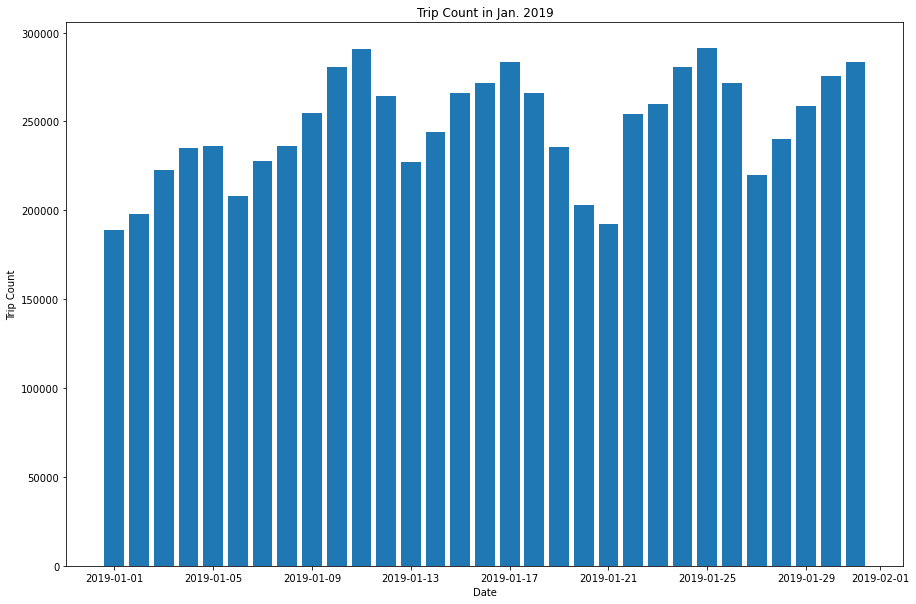

In [156]:
fig = plt.figure(figsize=(15,10))

record_2019_df = data_2019.value_counts('pickup_date').sort_index()
bar_chart = plt.bar(x =record_2019_df.index, 
                    height = record_2019_df.values)
bar_chart.colors = ["blue"]

plt.xlabel("Date")
plt.ylabel("Trip Count")
plt.title("Trip Count in Jan. 2019")

plt.show()

Create a new column that only contains the day

In [157]:
#data_2019['pickup_day'] = data_2019['pickup_date'].day
#data_2019.head()